# Prediction using Unsupervised M L

### From iris dataset we predict the optimum number of cluster and visualize the data. Here we are using KMean clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#importing data
ir_df=pd.read_csv('iris.csv')

In [3]:
x=ir_df.iloc[:,[0,1,2,3,]].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

C:\Users\MIDHUN KR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'WCSS')

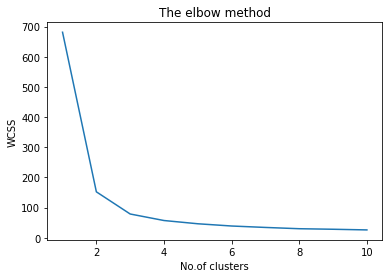

In [5]:
from sklearn.cluster import KMeans
wcss=[]         # With in cluster sum of squares
for i in range(1,11):
    km= KMeans(n_clusters=i ,init='k-means++',max_iter=300, n_init=10,random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)

# plot a graph using wcss vs no.of clusters
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('No.of clusters')
plt.ylabel('WCSS')


### From graph we choose the number of clusters as 3

In [8]:
# using this no.of cluster we will create new kmean

km =KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,random_state=0)

#prediction

y_kmean = km.fit_predict(x)

In [11]:
y_kmean

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

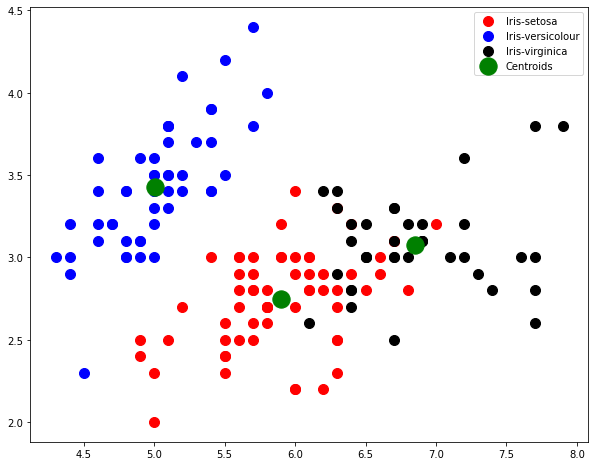

In [20]:
# Visualising clusters

plt.figure(figsize=(10,8))
plt.scatter(x[y_kmean==0,0],x[y_kmean==0,1],s=100,c='red',label = 'Iris-setosa')
plt.scatter(x[y_kmean == 1,0],x[y_kmean == 1,1], s=100,c='blue',label = 'Iris-versicolour' )
plt.scatter(x[y_kmean == 2,0],x[y_kmean == 2,1], s=100,c='black', label = 'Iris-virginica')

#plotting centroids of clusters 

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=300,c='green', label = 'Centroids')
plt.legend()